# 30 Day Map Challenge

## Day 7 - Raster

Plan: Map the night time lights of Egypt

In [1]:
import numpy as np
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import os
import richdem as rd

ModuleNotFoundError: No module named 'richdem'

In [ ]:
os.getcwd()
os.chdir("c:\\Users\\vicks\\OneDrive\\Data Science (not uni)\\Portfolio\\30 Day Map Challenge\\30 Day Map Challenge Data\\Raster")

In [ ]:
dem = rio.open("s30_e029_1arc_v3.tif")
dem_array = dem.read(1).astype('float64')

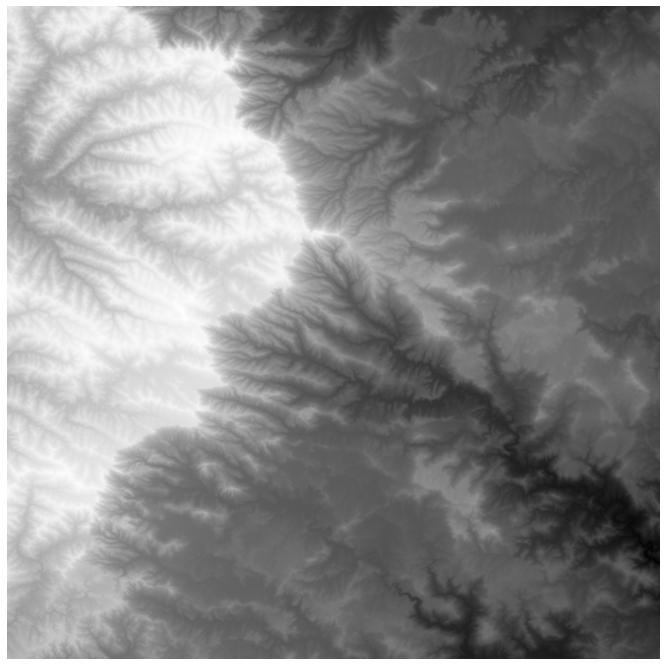

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array, cmap='Greys_r', ax=ax)
plt.axis("off")
plt.show()

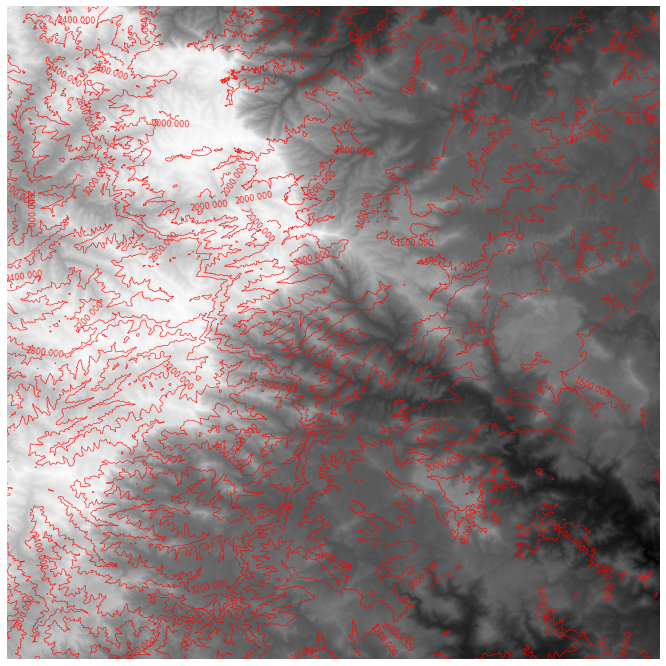

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show(dem_array, cmap='Greys_r', ax=ax)
show(dem_array, contour=True, ax=ax, linewidths=0.7)
plt.axis("off")
plt.show()